In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Algorithmics Indonesia/Python Pro 2/Module 4/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


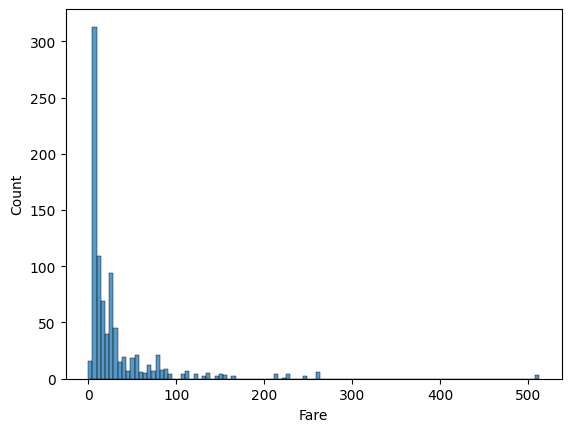

In [4]:
sns.histplot(df, x='Fare');

In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df[df['Age'].isnull()==True].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [8]:
df.loc[5]

,5
PassengerId,6
Survived,0
Pclass,3
Name,"Moran, Mr. James"
Sex,male
Age,NaN
SibSp,0
Parch,0
Ticket,330877
Fare,8.4583


In [9]:
print(177/df.shape[0])

0.19865319865319866


In [10]:
687/df.shape[0]

0.7710437710437711

In [11]:
# df['PassengerId'].unique()

In [12]:
# Step 1. Loading and cleaning data
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [13]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
import seaborn as sns

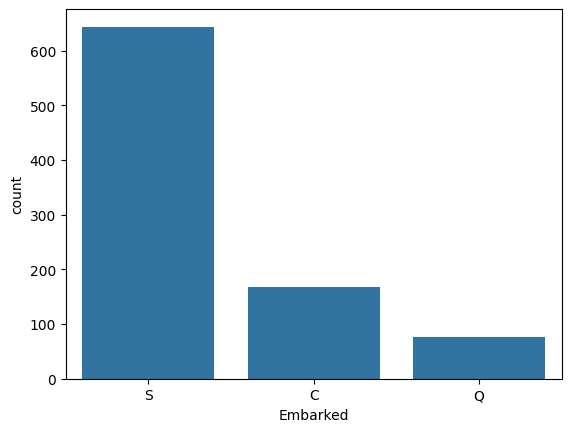

In [16]:
sns.countplot(df, x='Embarked');

In [17]:
df['Embarked'].isnull().sum()

np.int64(2)

In [18]:
df['Embarked'].fillna('S', inplace=True)

<ipython-input-18-6ad30875ebf2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [19]:
df = df.drop('Embarked', axis = 1)

In [20]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


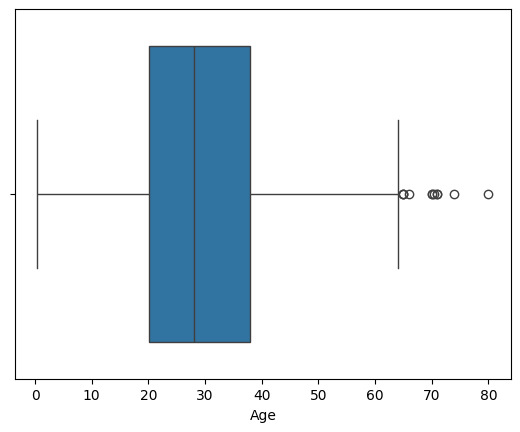

In [22]:
sns.boxplot(df, x='Age');

<Axes: xlabel='Age', ylabel='Count'>

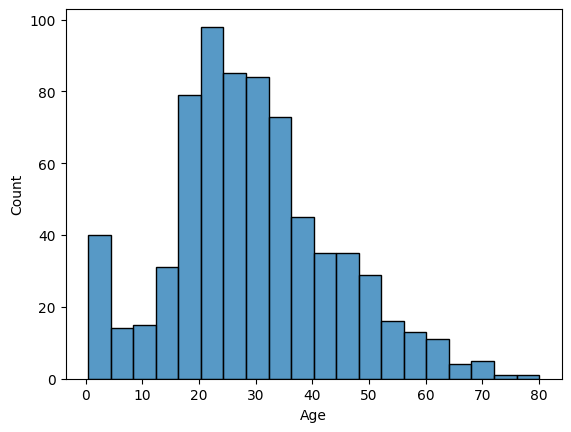

In [23]:
sns.histplot(df, x='Age')

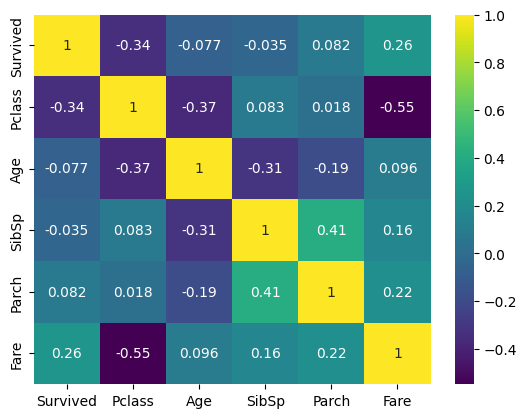

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis');

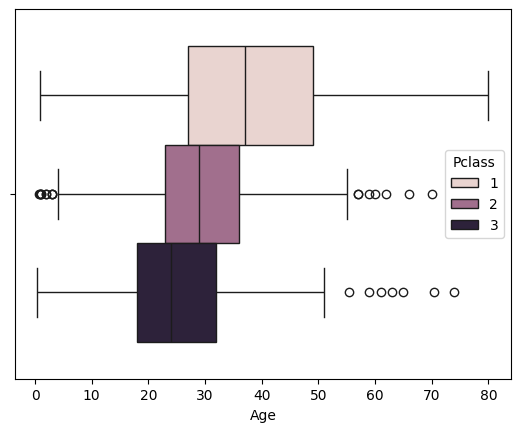

In [25]:
sns.boxplot(df, x='Age', hue='Pclass');

In [26]:
classes = df.groupby('Pclass')['Age'].agg(['mean', 'median'])

In [27]:
classes

,mean,median
Pclass,,
1,38.233441,37.0
2,29.877630,29.0
3,25.140620,24.0


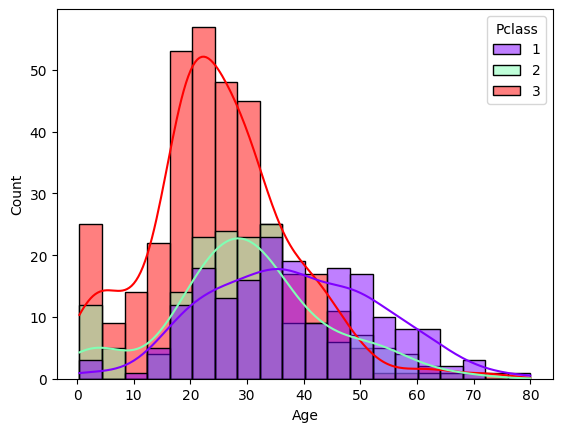

In [28]:
sns.histplot(df, x='Age', hue='Pclass', palette='rainbow', kde=True);

In [29]:
age_1 = int(df[df['Pclass'] == 1]['Age'].mean())
age_2 = int(df[df['Pclass'] == 2]['Age'].mean())
age_3 = int(df[df['Pclass'] == 3]['Age'].mean())

In [30]:
age_1, age_2, age_3

(38, 29, 25)

In [31]:
def fill_age(row):
   if pd.isnull(row['Age']):
       if row['Pclass'] == 1:
           return age_1
       if row['Pclass'] == 2:
           return age_2
       return age_3
   return row['Age']

In [32]:
df['Age'] = df.apply(fill_age, axis = 1)

In [33]:
df['Sex']

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [35]:
# def fill_sex(sex):
#     if sex == 'male':
#         return 1
#     return 0

In [36]:
# df['Sex'] = df['Sex'].apply(fill_sex)

NameError: name 'fill_sex' is not defined

In [ ]:
# df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True)

In [37]:
df = pd.get_dummies(df, drop_first=True)

In [38]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,25.0,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


In [39]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.252716,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.211959,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True


In [41]:
# Step 2. Creating a model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error

In [42]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [43]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male
805,3,31.00,0,0,7.7750,True
266,3,16.00,4,1,39.6875,True
443,2,28.00,0,0,13.0000,False
2,3,26.00,0,0,7.9250,False
78,2,0.83,0,2,29.0000,True
...,...,...,...,...,...,...
718,3,25.00,0,0,15.5000,True
784,3,25.00,0,0,7.0500,True
827,2,1.00,0,2,37.0042,True
594,2,37.00,1,0,26.0000,True


In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
classifier = KNeighborsClassifier(n_neighbors = 10)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
# help(DecisionTreeClassifier)

In [51]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [57]:
y_pred = classifier.predict(X_test)
tree_pred = tree_model.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1])

In [54]:
y_test

,Survived
209,1
93,0
169,0
103,0
764,0
...,...
548,0
487,0
754,1
879,1


In [55]:
print('Percentage of correctly predicted outcomes:', accuracy_score(y_test, y_pred) * 100)
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Percentage of correctly predicted outcomes: 85.44776119402985
Confusion matrix:
[[150  10]
 [ 29  79]]


In [58]:
print('Percentage of correctly predicted outcomes with tree model:', accuracy_score(y_test, tree_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, tree_pred))

Percentage of correctly predicted outcomes with tree model: 0.8544776119402985
Confusion matrix:
[[151   9]
 [ 30  78]]
